# Лабораторная работа 3.2.4 "Свободные колебания в электрическом контуре"

In [103]:
# подключим нужные библиотеки
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from math import pi, sqrt
import numpy as np
from IPython.display import display, HTML
from scipy.interpolate import interp2d

In [104]:
L = 143 * 1e-3
RL = 20.17
data = pd.DataFrame({
    "C" : [50, 100, 200, 300, 350, 400, 600, 800],
    "T_practice": [0.5, 0.667, 1, 1.25, 1.43, 1.54, 1.67, 2],
    "T_teor" : [0, 0, 0, 0, 0, 0, 0, 0]
})
data["C"] *= 1e-9 
data["T_practice"] *= 1e-3
C_last = 7 * 1e-9
data1 = pd.DataFrame({
    "R" : [300, 350, 400, 770, 1000, 1100, 1400, 1600, 2000],
    "teta" : [0.2, 0.2645, 0.277, 0.536, 0.733, 0.784, 1.03, 1.32, 1.67]
})

In [105]:
data["T_teor"] = 2 * pi * np.sqrt(L * data["C"])

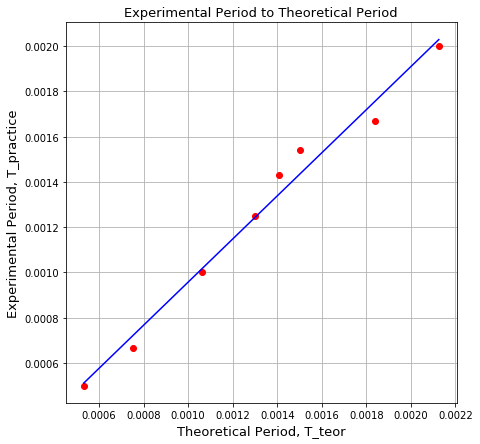

In [106]:
# Linear regression for making line at plot
xx = np.array(data["T_teor"].values.reshape(8))
yy = np.array(data["T_practice"].values.reshape(8))
weights = np.polyfit(xx, yy, 1)
model = np.poly1d(weights)

# Making plot
plt.figure(figsize=(7,7))
plt.plot(data["T_teor"], data["T_practice"], 'o', color = "red")
plt.plot(data["T_teor"], model(data["T_teor"]), color = "blue")
plt.title("Experimental Period to Theoretical Period", fontsize = 13)
plt.ylabel("Experimental Period, T_practice", fontsize = 13)
plt.xlabel("Theoretical Period, T_teor", fontsize = 13)
plt.grid(True)
plt.show()

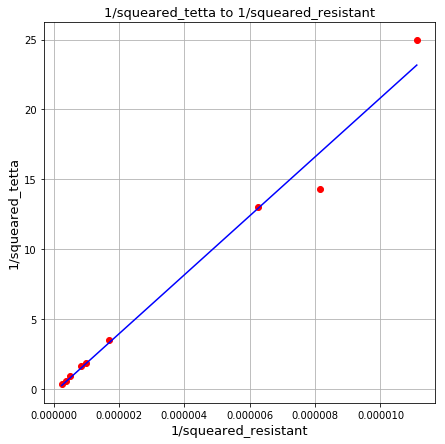

In [107]:
def necessaryFunction(someData):
    return 1 / (someData)**2
# Applying necessary functions
data1Copy = necessaryFunction(data1)

# Linear regression for making line at plot
xx = data1Copy["R"].values
yy = data1Copy["teta"].values
xx = xx.reshape(len(data1["R"]), 1)
yy = yy.reshape(len(data1["teta"]), 1)
regressor = linear_model.LinearRegression()
regressor.fit(xx, yy)

# Making plot
plt.figure(figsize=(7,7))
plt.plot(data1Copy["R"], data1Copy["teta"], 'o', color = "red")
plt.plot(data1Copy["R"], regressor.predict(xx), color = "blue")
plt.title("1/squeared_tetta to 1/squeared_resistant", fontsize = 13)
plt.ylabel("1/squeared_tetta", fontsize = 13)
plt.xlabel("1/squeared_resistant", fontsize = 13)
plt.grid(True)
plt.show()

In [108]:
R_critical_practical = 2 * pi * np.sqrt(regressor.coef_[0][0])
R_critical_practical

9129.837605821012

In [109]:
R_critical_theory = 2 * np.sqrt(L / C_last)
R_critical_theory

9039.5954397465

In [110]:
Q_min_res_prac = pi / data1["teta"][0]
Q_max_res_prac = pi / data1["teta"][8]

In [111]:
Q_min_res_teor = (1/data1["R"][0]) * np.sqrt(L/C_last)
Q_max_res_teor = (1/data1["R"][8]) * np.sqrt(L/C_last)

In [112]:
print(Q_min_res_prac)
print(Q_max_res_prac)
print(Q_min_res_teor)
print(Q_max_res_teor)

15.707963267948966
1.8811932057423912
15.0659923995775
2.2598988599366248


In [114]:
Q_spiral = pi / 0.56
Q_spiral

5.609986881410344